In [52]:
import os
import pandas as pd
%matplotlib inline
from datetime import timedelta
os.chdir('/gpfs2/projects/project-bus_capstone_2016/workspace/share')

In [8]:
dot_sample = pd.read_csv('20141201.csv',header=None,names=['Vehicle','Route','Direction','Phase','NMEA'])

In [9]:
dot_sample.head()

,Vehicle,Route,Direction,Phase,NMEA
0,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002005.610,A,4047.23656,N,07356.79964,W..."
1,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002037.609,A,4047.23656,N,07356.79964,W..."
2,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002109.609,A,4047.23656,N,07356.79964,W..."
3,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002140.609,A,4047.23656,N,07356.79964,W..."
4,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002520.609,A,4047.23656,N,07356.79964,W..."


In [21]:
def time_from_nmea(s):
    h = int(s[7:9])
    m = int(s[9:11])
    s = float(s[11:16])
    return timedelta(hours=h,minutes=m,seconds=s)

In [22]:
dot_sample['timestamp'] = dot_sample.NMEA.apply(time_from_nmea)

In [23]:
dot_sample.head(10)

,Vehicle,Route,Direction,Phase,NMEA,timestamp
0,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002005.610,A,4047.23656,N,07356.79964,W...",00:20:05.610000
1,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002037.609,A,4047.23656,N,07356.79964,W...",00:20:37.600000
2,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002109.609,A,4047.23656,N,07356.79964,W...",00:21:09.600000
3,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002140.609,A,4047.23656,N,07356.79964,W...",00:21:40.600000
4,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002520.609,A,4047.23656,N,07356.79964,W...",00:25:20.600000
5,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002624.609,A,4047.23656,N,07356.79964,W...",00:26:24.600000
6,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002655.609,A,4047.23656,N,07356.79964,W...",00:26:55.600000
7,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002727.609,A,4047.23656,N,07356.79964,W...",00:27:27.600000
8,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002759.609,A,4047.23656,N,07356.79964,W...",00:27:59.600000
9,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002830.609,A,4047.23656,N,07356.79964,W...",00:28:30.600000


In [42]:
dot_sample.sort(['Vehicle','timestamp'],inplace=True)

In [64]:
dot_sample['elapsed'] = dot_sample.groupby(['Vehicle'])['timestamp'].diff()/timedelta(seconds=1)

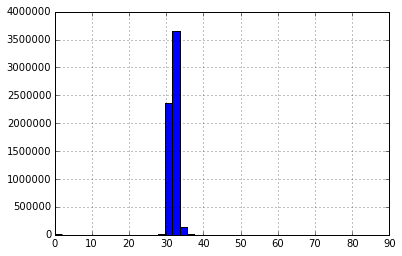

In [69]:
dot_sample['elapsed'].dropna().hist(range=(0,89),bins=45)

In [77]:
# percent of AVL pings received under 35 seconds from previous
sum(dot_sample['elapsed'].dropna()<35.0)/(1.0*(len(dot_sample['elapsed'].dropna())))

0.98604550679763969